Table of Contents
*   Q1: How many unique device IDs are there in this dataset?
*   Q2: You are asked to do data analysis. What will you find?
*   Q3: Which kind of machine learning will be used and why?
*   Q4: Important features, informative features, or coefficient values.
*   Q5: Predict failure values

In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# ml essentials
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [9]:
df = pd.read_csv('/content/maintenance_prediction.csv')
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


## Q1: How many unique device IDs are there in this dataset?

In [8]:
# Calculate the number of unique device IDs in the dataset
unique_device_ids = df['device'].nunique()
print('There are 1169 unique device IDs in the dataset.')

There are 1169 unique device IDs in the dataset.


## Q2: You are asked to do data analysis. What will you find?

### Data Assessment

In [10]:
# data assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [11]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [12]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

#### Summary Statistics


*   **Metric1**: Ranges from 0 to 244,140,500 with a mean around 122,388,100.
*   **Metric2**: Ranges from 0 to 64,968, averaging around 159.
*   **Metric3**: Ranges from 0 to 24,929 with very low average close to 10.
*   **Metric4**: Spans from 0 to 1,666, typically very low near 1.
*   **Metric5, Metric6, Metric7, Metric8, Metric9**: Show varying degrees of spread, with most metrics concentrated around lower values.

### Data Visualization

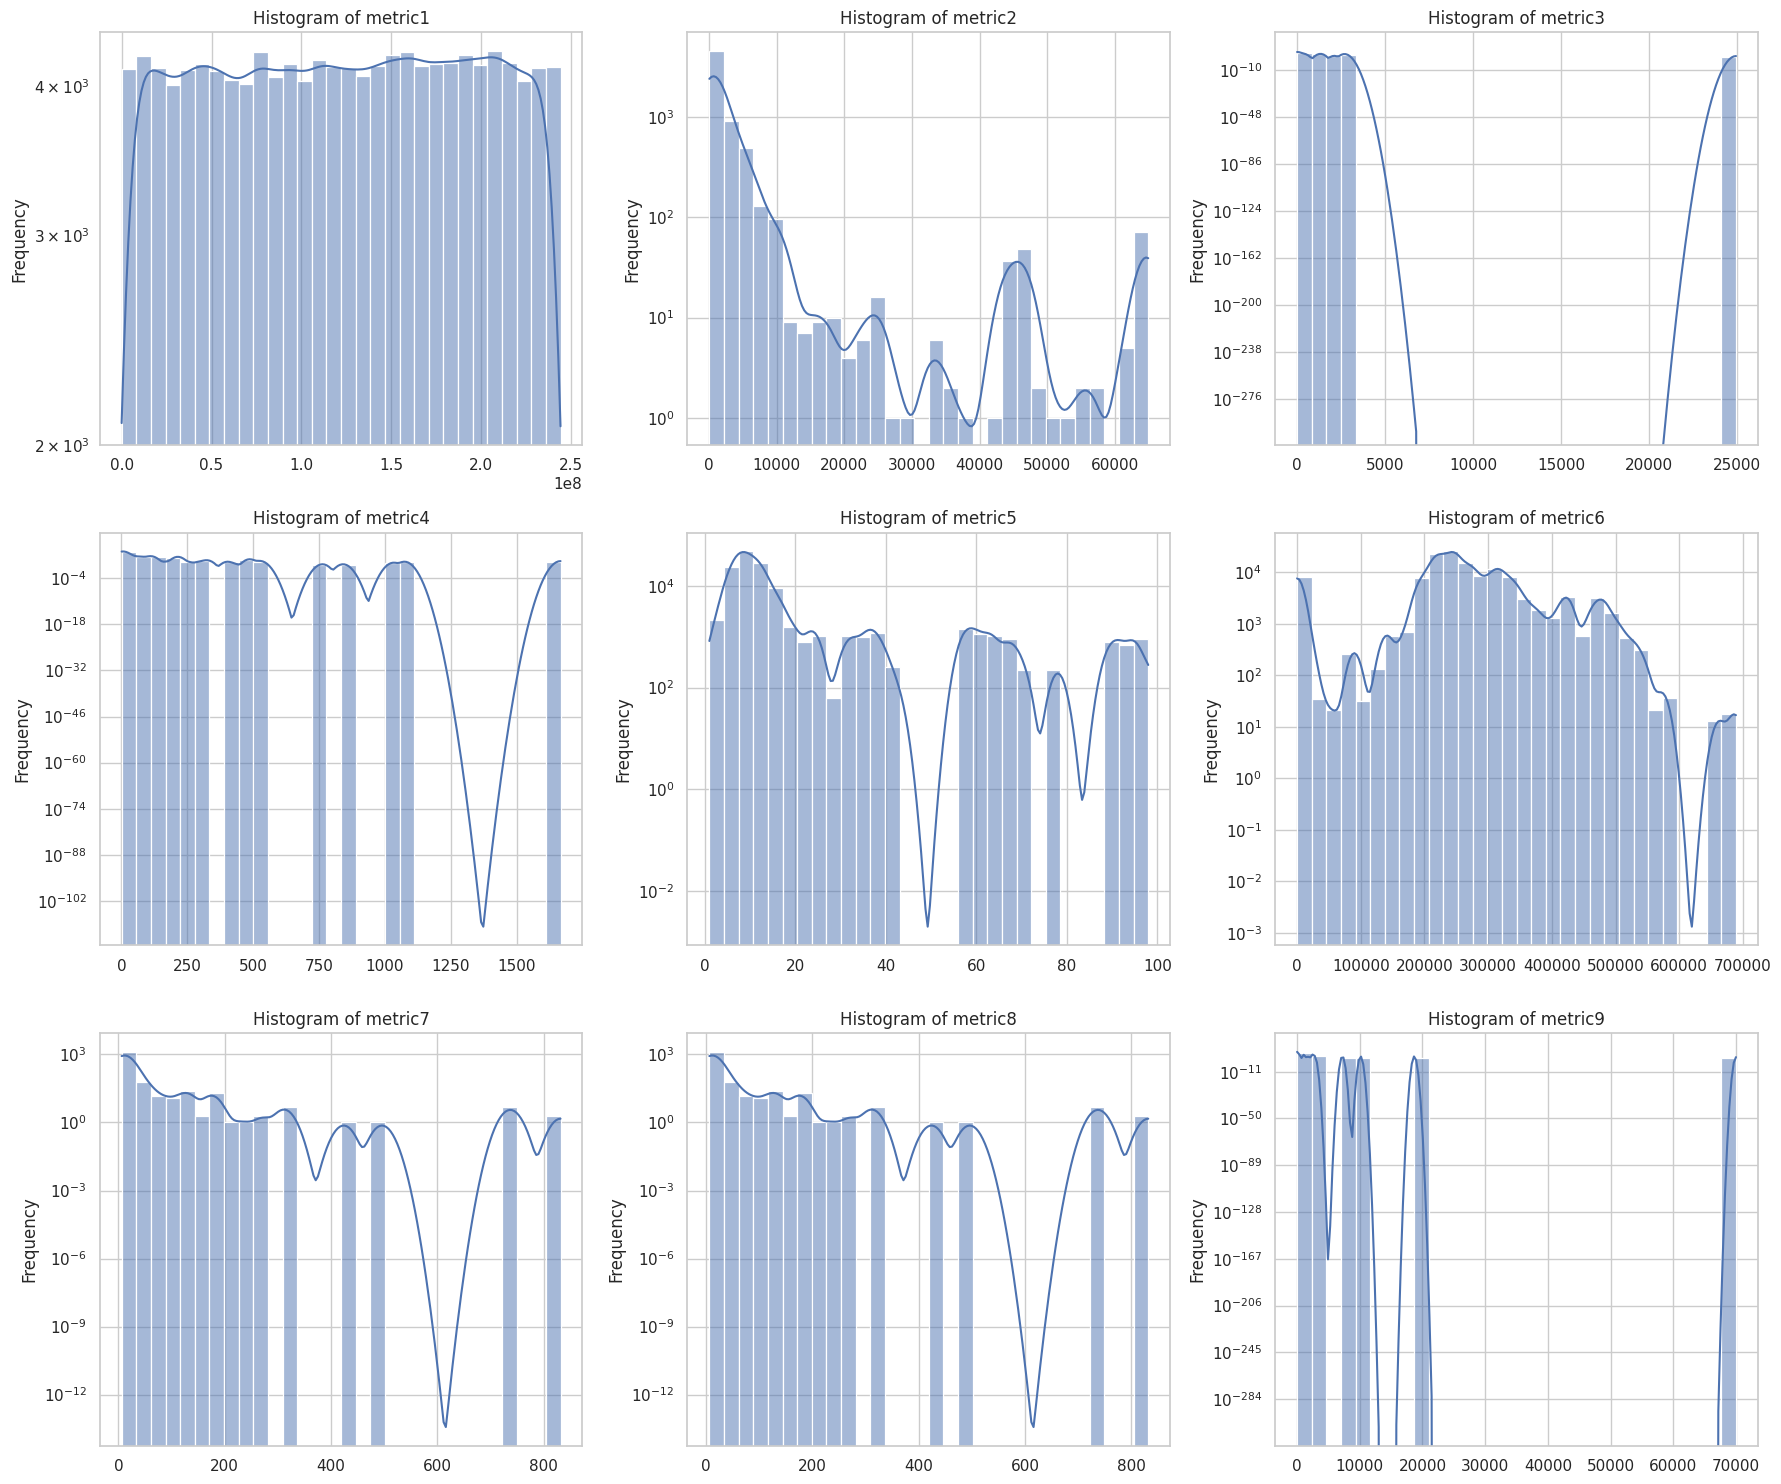

In [13]:
# histograms
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Prepare figure layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# List of metrics to plot
metrics = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

# Create histograms
for ax, metric in zip(axes.flatten(), metrics):
    sns.histplot(df[df[metric] != 0][metric], bins=30, ax=ax, kde=True)  # Filtering zero values for clearer distribution
    ax.set_title(f'Histogram of {metric}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')  # Using logarithmic scale due to wide distribution ranges

plt.tight_layout()
plt.show()

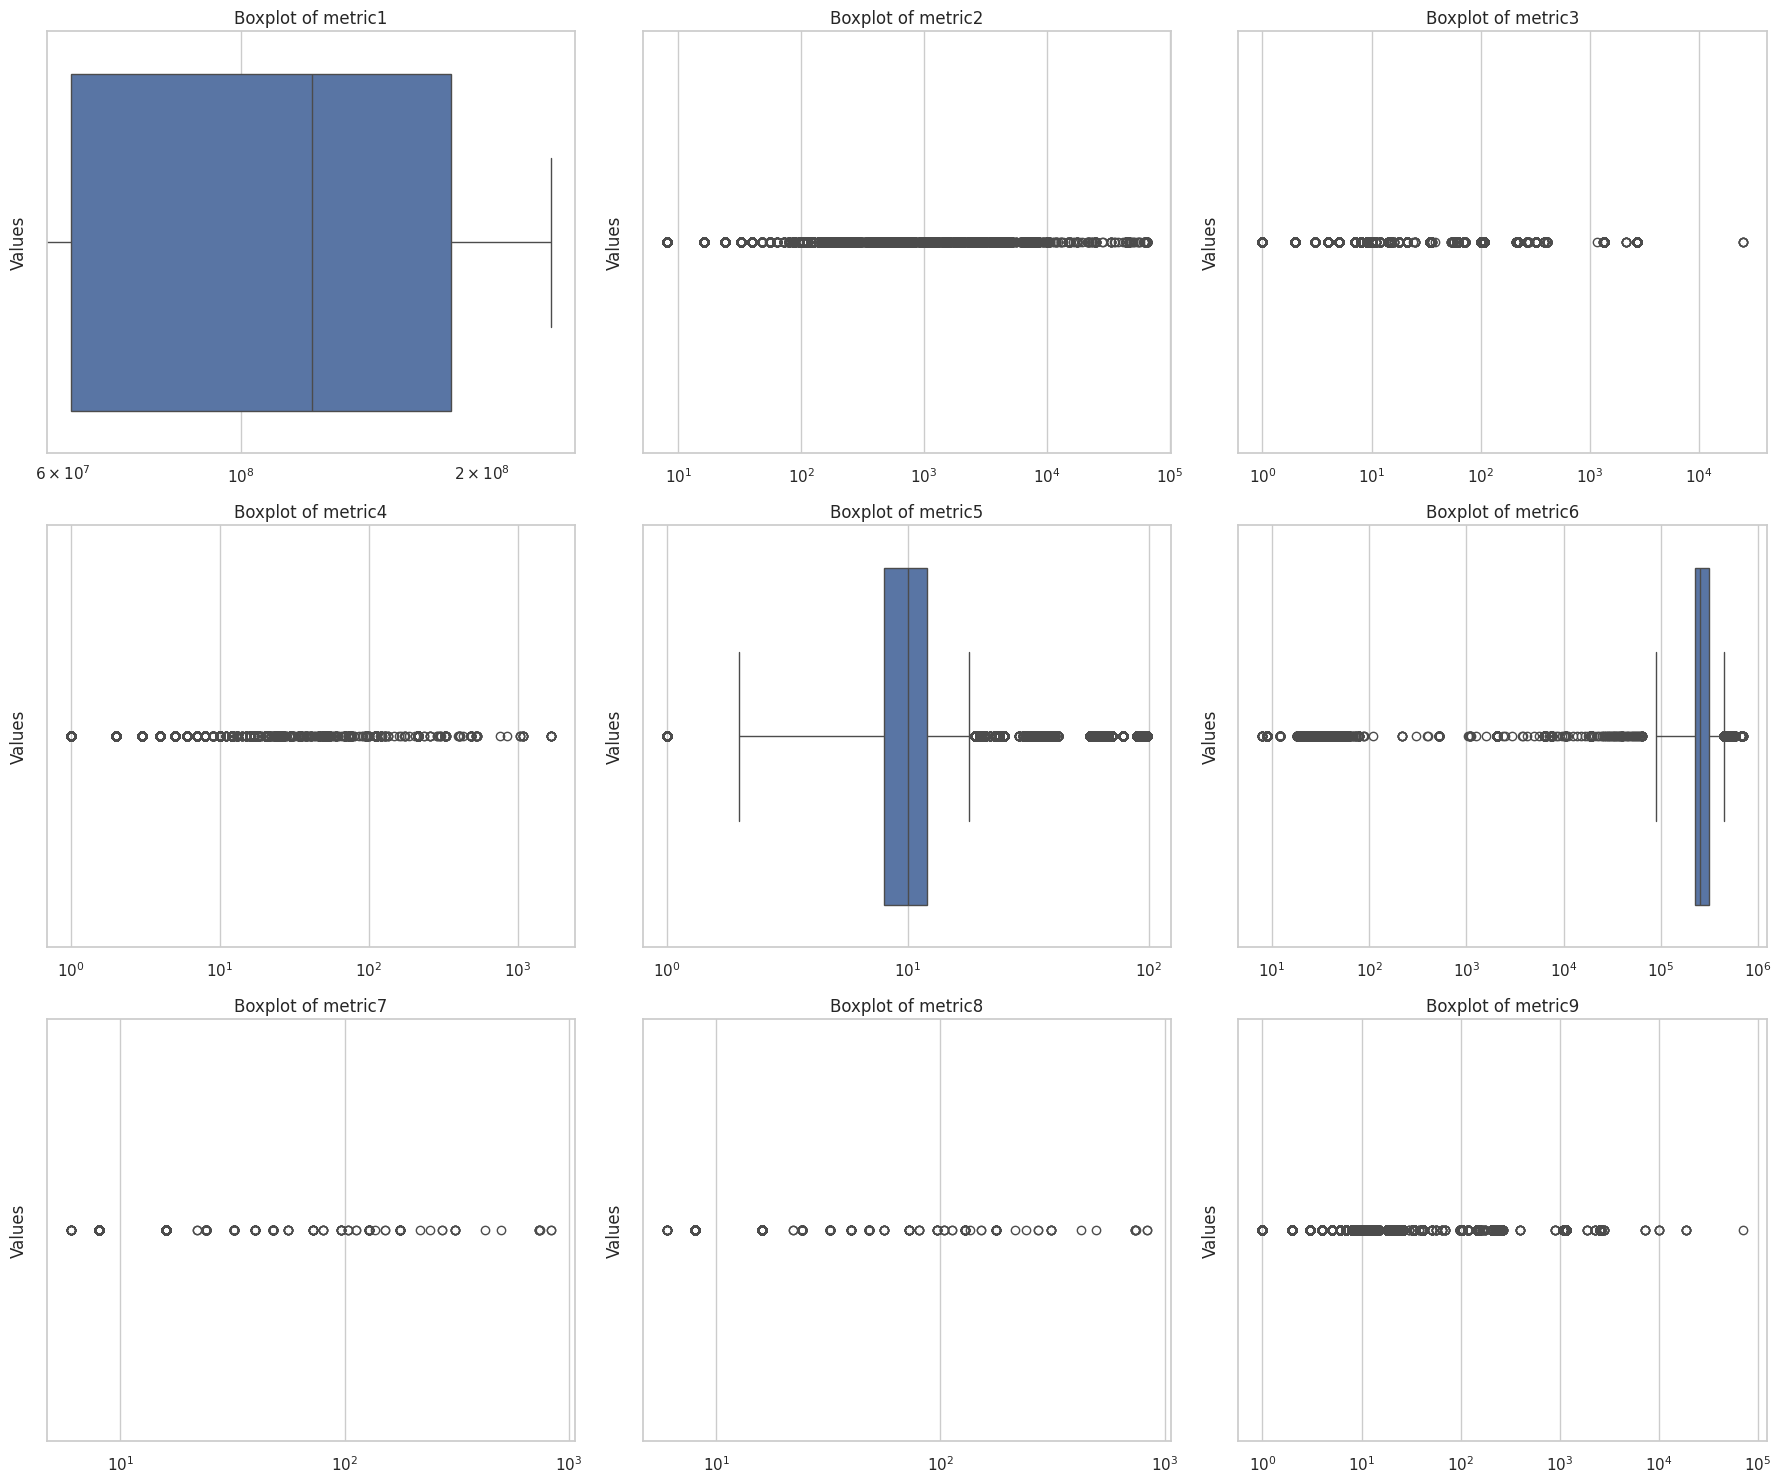

In [14]:
# boxplots
# Prepare figure layout for boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Create boxplots
for ax, metric in zip(axes.flatten(), metrics):
    sns.boxplot(x=df[metric], ax=ax)
    ax.set_title(f'Boxplot of {metric}')
    ax.set_xlabel('')
    ax.set_ylabel('Values')
    ax.set_xscale('log')  # Using logarithmic scale due to wide distribution ranges

plt.tight_layout()
plt.show()

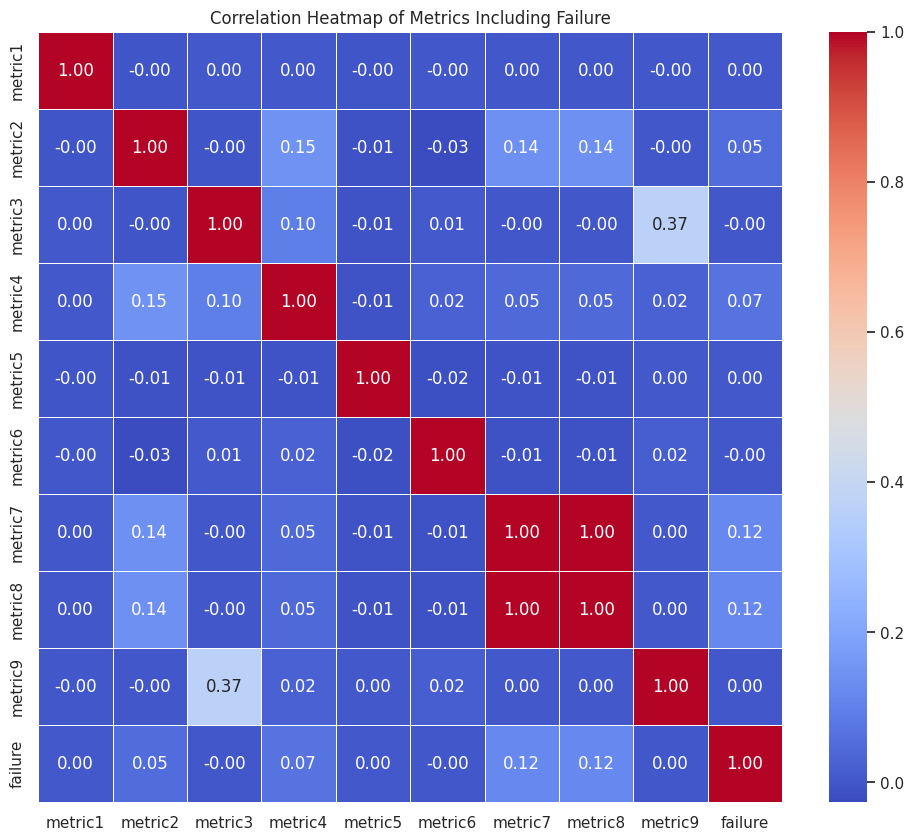

In [15]:
# heatmap
# Include 'failure' in the metrics for the correlation matrix
metrics_with_failure = metrics + ['failure']

# Calculate correlation matrix including the 'failure' variable
corr_matrix_with_failure = df[metrics_with_failure].corr()

# Plot correlation heatmap including 'failure'
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_with_failure, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Metrics Including Failure')
plt.show()

## Q3: Which kind of machine learning will be used and why?
Given the nature of the data and the problem (predicting device failure), I would start with **XGBoost(supervise learning, classification)**, since this model can be particularly effective due to its robustness and the ability to fine-tune it for specific performance metrics using its extensive range of hyperparameters.

### XGBoost

In [338]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Prepare features and target variable
X = df.drop(['failure', 'date', 'device'], axis=1)  # Drop non-feature column
y = df['failure']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [364]:
import xgboost as xgb
from sklearn.metrics import f1_score, make_scorer

# Define the DMatrix data format for optimized performance of XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
# More parameters can be tuned as necessary
params = {
    'max_depth': 20,  # typical values range from 3 to 10
    'min_child_weight': 1,  # defines the minimum sum of weights of all observations required in a child
    'eta': 0.1,  # learning rate
    'subsample': 0.8,  # fraction of observations to be randomly sampled for each tree
    'colsample_bytree': 0.8,  # fraction of columns to be randomly sampled for each tree
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss'  # optimization metric
}

# Define a function to evaluate F1 score
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    preds = y_pred > 0.5  # threshold can be tuned
    return 'f1', f1_score(y_true, preds)

# Train the model with custom evaluation
num_boost_round = 999  # number of boosting rounds or trees to build
early_stopping_rounds = 20  # stops training if no improvement is observed

bst = xgb.train(params,
                dtrain,
                num_boost_round,
                evals=[(dtest, "Test")],
                early_stopping_rounds=early_stopping_rounds,
                feval=f1_eval,
                maximize=True)

# Predict on the test set
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.015).astype(int)  # Apply threshold

# Evaluate the model
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	Test-logloss:0.11626	Test-f1:0.00000
[1]	Test-logloss:0.10489	Test-f1:0.00000
[2]	Test-logloss:0.09472	Test-f1:0.00000
[3]	Test-logloss:0.08563	Test-f1:0.00000
[4]	Test-logloss:0.07749	Test-f1:0.00000
[5]	Test-logloss:0.07018	Test-f1:0.00000
[6]	Test-logloss:0.06363	Test-f1:0.00000
[7]	Test-logloss:0.05777	Test-f1:0.00000
[8]	Test-logloss:0.05248	Test-f1:0.00000
[9]	Test-logloss:0.04774	Test-f1:0.00000
[10]	Test-logloss:0.04348	Test-f1:0.00000
[11]	Test-logloss:0.03964	Test-f1:0.00000
[12]	Test-logloss:0.03619	Test-f1:0.00000
[13]	Test-logloss:0.03308	Test-f1:0.00000
[14]	Test-logloss:0.03027	Test-f1:0.00000
[15]	Test-logloss:0.02775	Test-f1:0.00000
[16]	Test-logloss:0.02548	Test-f1:0.00000
[17]	Test-logloss:0.02341	Test-f1:0.00000
[18]	Test-logloss:0.02157	Test-f1:0.00000
[19]	Test-logloss:0.01992	Test-f1:0.00000
[20]	Test-logloss:0.01843	Test-f1:0.00000
0.016549968173138127
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     2487

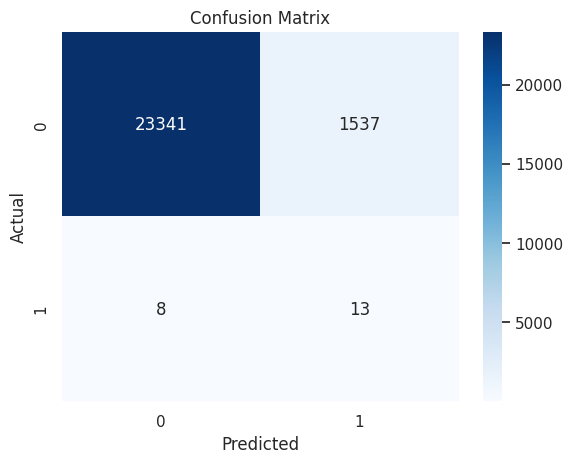

In [365]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q4: Important features, informative features, or coefficient values.

### Extracting Feature Importance

In [366]:
# Get feature importance
importance = bst.get_score(importance_type='gain')  # Can also use 'weight' or 'cover'
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
for feature, score in sorted_importance:
    print(f"Feature: {feature}, Score: {score}")

Feature: metric7, Score: 4.614272594451904
Feature: metric8, Score: 3.8613386154174805
Feature: metric4, Score: 2.4221036434173584
Feature: metric2, Score: 1.9441925287246704
Feature: metric6, Score: 1.8371529579162598
Feature: metric5, Score: 1.6832859516143799
Feature: metric9, Score: 1.4466276168823242
Feature: metric1, Score: 1.4281045198440552
Feature: metric3, Score: 0.8079913258552551


## Q5: Predict failure values

In [372]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Example data as per your description
data = {
    'metric1': [127175526, 4527376],
    'metric2': [4109.434, 0],
    'metric3': [3.905668, 0],
    'metric4': [54.63206, 0],
    'metric5': [15.46225, 3240],
    'metric6': [2583035, 0],
    'metric7': [30.62264, 0],
    'metric8': [30.62264, 0],
    'metric9': [238491, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert DataFrame to DMatrix (XGBoost format)
dtest = xgb.DMatrix(df)

# Load your trained XGBoost model (make sure to replace 'bst' with your model variable)
# bst = xgb.Booster()  # Uncomment and load your model as necessary
# bst.load_model('path_to_your_model.model')  # Load model if not already in memory

# Prediction
y_pred_prob = bst.predict(dtest)

# Output predictions
y_pred = (y_pred_prob > 0.015).astype(int)  # Apply threshold
print('Prediction of if device AA is malfunctioning:', y_pred[0])
print('Prediction of if device BB is malfunctioning:', y_pred[1])


Prediction of if device AA is malfunctioning: 1
Prediction of if device BB is malfunctioning: 0
